# Logistic regression
## Classification with logistic regression and the sigmoid function: a tractable step function

$$\sigma (z) = \frac{1}{1+e^{-z}}$$

- $e^x$ 为单调递增函数
- $\sigma (z) = \frac{1}{1+e^{-z}}$也是单调递增函数。其定义域为实数域，值域为 0 - 1 之间

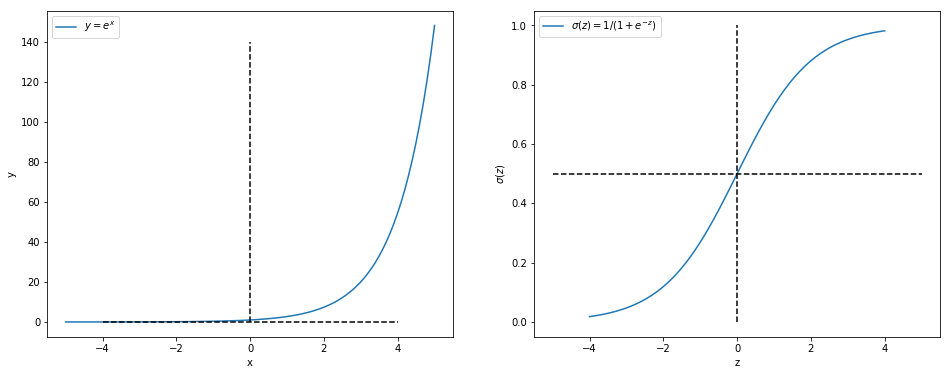

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,np.exp(x),label='$y=e^x$')
ax1.plot([-4,4],[0,0],'k--')
ax1.plot([0,0],[0,140],'k--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

ax2 = fig.add_subplot(1,2,2)
z = np.linspace(-4,4,100)
ax2.plot(z, 1/(1+np.exp(-1*z)),label='$\sigma(z)= {1}/(1+e^{-z})$')
ax2.plot([-5,5],[0.5,0.5],'k--')
ax2.plot([0,0],[0,1],'k--')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.legend()
plt.show()

## Using optimization to find the best regression coefficients
- The input to the sigmoid function described will be z, where z is given by the following:
$$z = w_0x_0 + w_1x_1 + w_2x_2+...+w_nx_n$$

In vector notation we can write this as $z = w^Tx$
- $x$ is the input features
- $w$ is the best coefficients

### 二项逻辑斯谛回归模型
二项逻辑斯谛回归模型是如下的条件概率分布（两者概率的和为1）:
$$P(Y=1|x)=\frac{e^{w*x+b}}{1+e^{w*x+b}}$$


$$P(Y=0|x)=\frac{1}{1+e^{w*x+b}}$$

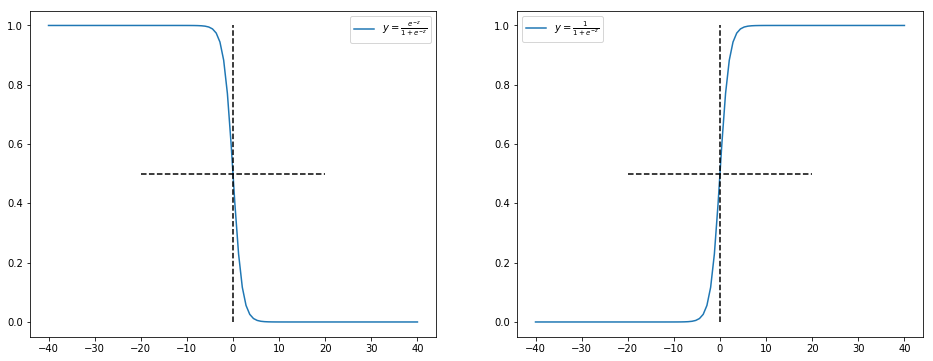

In [6]:
import numpy as np
z = np.linspace(-40,40,100)
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
plt.plot(z, np.exp(-1*z)/(1+np.exp(-1*z)),label='$y=\\frac{e^{-z}}{1+e^{-z}}$')
plt.plot([-20,20],[0.5,0.5],'k--')
plt.plot([0,0],[0,1],'k--')
plt.legend()

ax1 = fig.add_subplot(1,2,2)
plt.plot(z, 1/(1+np.exp(-1*z)),label='$y=\\frac{1}{1+e^{-z}}$')
plt.plot([-20,20],[0.5,0.5],'k--')
plt.plot([0,0],[0,1],'k--')
plt.legend()
plt.show()

**Odds:**  
$$odds = \frac{p}{1-p}$$

**Log Odds or logit function:**  
$$logit(p) = \log \frac{p}{1-p}$$

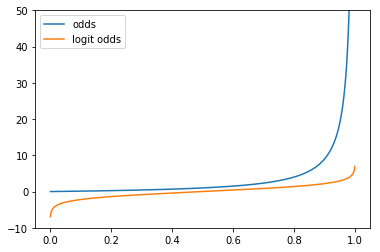

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the range of propability from 0 to 1
p = np.arange(0.001,1,0.001)
odds = p/(1-p)
logitP = np.log(odds)
plt.figure()
plt.plot(p,odds,label='odds')
plt.plot(p,logitP,label='logit odds')
plt.ylim(-10,50)
plt.legend()
plt.show()

观察上图可知：
- log odds 作用是把实属域映射到0和1之间的概率值，正无穷和1对应，负无穷和0对应。  
- 平面上的一条直线可以把一个平面分成两部分，一侧函数值大于0，另一侧小于0，且点离直线越远其绝对值越大。

对于逻辑回归而言:
$$logit(p)=\log \frac{p}{1-p} = \log \frac{P(Y=1|x)}{1-P(Y=1|x)} = \log \frac{\frac{e^z}{1+e^z}}{\frac{1}{1+e^z}}= \log e^z = wx$$

这就是说，在逻辑斯谛回归模型中，输出$Y=1$的对数几率式输入$x$的线性函数。或者说，输出Y=1的对数几率是由输入x的线性函数表示的模型，即逻辑斯谛回归模型。

## 极大似然估计

> 最大似然估计是利用已知的样本的结果，在使用某个模型的基础上，反推最有可能导致这样结果的模型参数值。

>举个通俗的例子：假设一个袋子装有白球与红球，比例未知，现在抽取10次（每次抽完都放回，保证事件独立性），假设抽到了7次白球和3次红球，在此数据样本条件下，可以采用最大似然估计法求解袋子中白球的比例（最大似然估计是一种“模型已定，参数未知”的方法）。当然，这种数据情况下很明显，白球的比例是70%，但如何通过理论的方法得到这个答案呢？一些复杂的条件下，是很难通过直观的方式获得答案的，这时候理论分析就尤为重要了，这也是学者们为何要提出最大似然估计的原因。我们可以定义从袋子中抽取白球和红球的概率如下：

$$f(x_1,x_2|\theta) = f(x_1|\theta)\times f(x_2|\theta)$$
<center><u>$x_1$为第一次采样,$x_2$为第二次采样, f为模型,$\theta$为模型参数</u></center>  

>其中$\theta$是未知的，因此我们定义似然函数L为:
$$L(\theta|x_1,x_2)=f(x_1,x_2|\theta)=\prod_{i=1}^{2} f(x_i|\theta)$$

>变为log 对数似然函数，右边乘法可以变为加法，方便求导：
$$ln L(\theta|x_1,x_1)=\ln \sum_{i=1}^{2}f(x_i|\theta)=\sum_{i=1}^{2}\ln f(x_i|\theta)$$

>这是平均对数似然: $\hat e = \frac{1}{2} \ln L(\theta|x_1,x_2)$
最大似然估计的过程，就是找到一个合适的$\theta$，使得平均对数似然的值最大。因此，可以得到以下公式:
$$\hat \theta = \arg \max \hat e(\theta | x_1, x_2)$$

>这里讨论的是2次采样的情况，当然也可以拓展到多次采样的情况：
$$\hat \theta = \arg \max \hat e(\theta | x_1, x_2,..., x_n)$$

>我们定义M为模型（也就是之前公式中的f），表示抽到白球的概率为\theta，而抽到红球的概率为(1-theta)，因此10次抽取抽到白球7次的概率可以表示为：
$$P(x_1,x_2,...,x_10|M)=P(x_1|m)\times P(x_2|m)...\times P(x_10|m)=\theta^7(1-\theta)^3$$

>将其描述为平均似然可得：
$$\hat e = \frac{1}{10} \ln P(x_1,x_2,...,x_10|M)=\frac{1}{10}\ln [\theta^7(1-\theta)^3]$$

>那么最大似然就是找到一个合适的theta，获得最大的平均似然。因此我们可以对平均似然的公式对theta求导，并令导数为0。
$$\hat e(\theta) = 7\theta^6(1-\theta)^3 - 3\theta^7(1-\theta)^2=0\Rightarrow \theta = 0.7$$

>由此可知，当抽取白球的概率为0.7时，最可能产生10次抽取到白球7次的事件。

### 模型参数估计
![001](./src/LR_01.png)

![002](./src/LR_02.png)

![003](./src/LR_03.png)

![004](./src/LR_04.png)

![005](./src/LR_05.png)

![006](./src/LR_06.png)

### Gradient ascent 
- To find the maximum point

$$\nabla f(x,y) = \left(\begin{array}{c}
\frac{\partial f(x,y)}{\partial x} \\ 
\frac{\partial f(x,y)}{\partial y} \\
\end{array}\right) $$

$$w:=w+\alpha \nabla f(w)$$

### Train: using gradient ascent to find the best parameters 

In [ ]:
import numpy as np

def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('./src/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [5]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [6]:
def gradAscent(dataMatIn, classLabels):
    errorHistory = []
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)
        errorHistory.append(error.getA().sum(axis=0))
        weights = weights + alpha * dataMatrix.transpose()*error
    return weights, errorHistory

In [7]:
def plotBestFit(weights, errorHisotory):
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure(figsize=(16,6))

    ax1 = fig.add_subplot(121)
    ax1.plot(range(len(errorHisotory)), errorHisotory)
    ax1.plot([0, 0], [min(errorHisotory), max(errorHisotory)], 'k--')
    ax1.plot([0, len(errorHisotory)], [0, 0],  'k--')
    plt.xlabel('iteration counts')
    plt.ylabel('total error')
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(xcord1, ycord1, s=30, c='red', marker='s', label='class0')
    ax2.scatter(xcord2, ycord2, s=30, c='green', label='class1')
    x = np.arange(-5.0, 5.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax2.plot(x, y)
    ax2.legend()
    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.show()

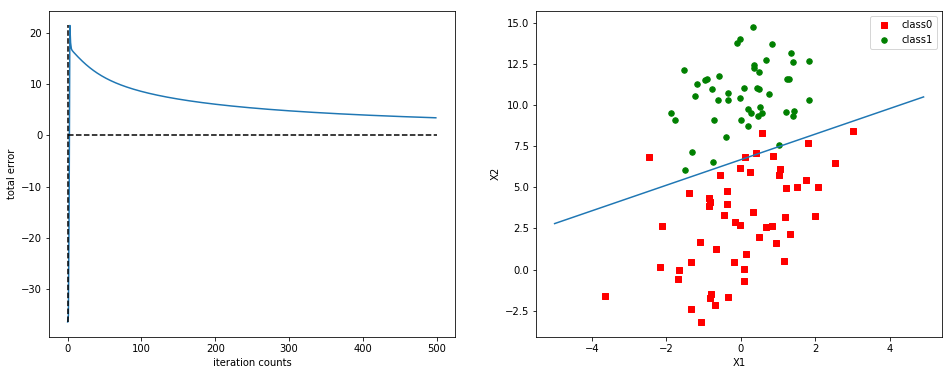

In [8]:
dataArr, labelMat = loadDataSet()
weights, errorHisotory = gradAscent(dataArr, labelMat)

plotBestFit(weights.getA(), errorHisotory)

### Train: stochastic gradient ascent

In [9]:
def stocGradAscent0(dataMatrix, classLabels):
    errorHistory = []
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
        
        # add erros history record
        h_ = sigmoid((dataMatrix*weights).sum(axis=1))
        error_ = (classLabels - h_)
        errorHistory.append(error_.sum(axis=0))
        
    return weights,errorHistory

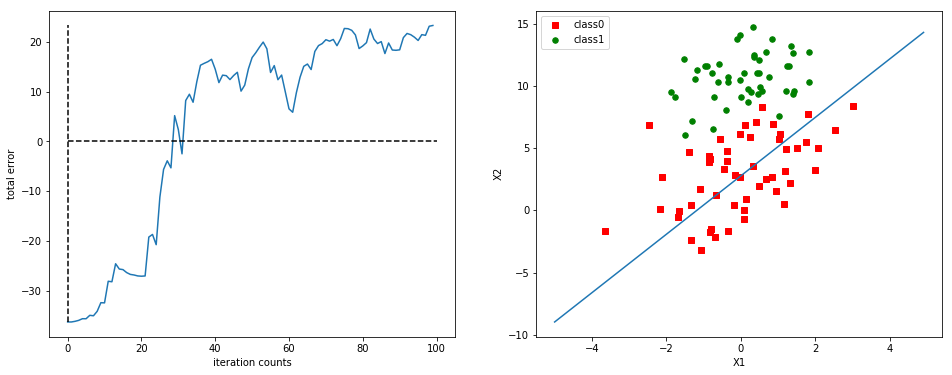

In [10]:
dataArr,labelMat=loadDataSet()
weights ,errorHistory= stocGradAscent0(np.array(dataArr),labelMat)
plotBestFit(weights,errorHistory)

In [11]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    errorHistory = []
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
            # add erros history record
            h_ = sigmoid((dataMatrix*weights).sum(axis=1))
            error_ = (classLabels - h_)
            errorHistory.append(error_.sum(axis=0))
    return weights,errorHistory

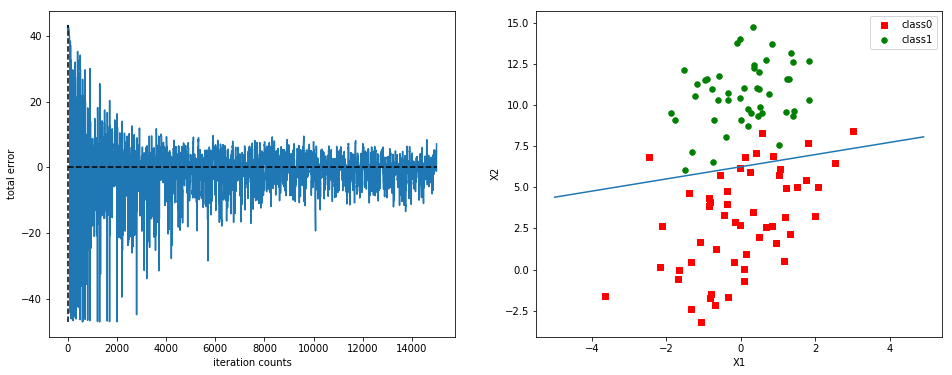

In [12]:
dataArr,labelMat=loadDataSet()
weights ,errorHistory= stocGradAscent1(np.array(dataArr),labelMat)
plotBestFit(weights,errorHistory)